In [64]:
import pandas as pd

data = pd.read_csv('C:/Users/User/Desktop/10/MachineLearningRating_v3/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)
print("\nData Types of Each Column:")
print(data.dtypes)



Data Types of Each Column:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object


In [21]:
print(data['LegalType'].value_counts())

Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: LegalType, dtype: int64


In [22]:

print("\nDescriptive Statistics for Numerical Features:")
print(data.describe(include=[float, int]))

# Calculate additional variability measures
numerical_features = ['TotalPremium', 'TotalClaims'] 
print("\nAdditional Variability Measures:")
for feature in numerical_features:
    if feature in data.columns:
        print(f"\nStatistics for {feature}:")
        print(f"Variance: {data[feature].var()}")
        print(f"Standard Deviation: {data[feature].std()}")
        print(f"Mean: {data[feature].mean()}")
        print(f"Median: {data[feature].median()}")
        print(f"Min: {data[feature].min()}")
        print(f"Max: {data[feature].max()}")



Descriptive Statistics for Numerical Features:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.98

In [12]:
print("\nData Summary:")
print(data.describe(include='all')) 

numerical_features = ['TotalPremium', 'TotalClaims']
print("\nDescriptive Statistics for Numerical Features:")
print(data[numerical_features].describe())

print("\nVariability for Numerical Features:")
print(data[numerical_features].std())  


Data Summary:
        UnderwrittenCoverID      PolicyID     TransactionMonth  \
count          1.000098e+06  1.000098e+06              1000098   
unique                  NaN           NaN                   23   
top                     NaN           NaN  2015-08-01 00:00:00   
freq                    NaN           NaN               106747   
mean           1.048175e+05  7.956682e+03                  NaN   
std            6.329371e+04  5.290039e+03                  NaN   
min            1.000000e+00  1.400000e+01                  NaN   
25%            5.514300e+04  4.500000e+03                  NaN   
50%            9.408300e+04  7.071000e+03                  NaN   
75%            1.391900e+05  1.107700e+04                  NaN   
max            3.011750e+05  2.324600e+04                  NaN   

       IsVATRegistered Citizenship   LegalType    Title Language  \
count          1000098     1000098     1000098  1000098  1000098   
unique               2           4           6        5 

In [24]:
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce', format='%Y-%m')


In [25]:
categorical_features = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'VehicleType', 'bodytype', 'AlarmImmobiliser',
    'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
    'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory',
    'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]
for feature in categorical_features:
    if feature in data.columns:
        data[feature] = data[feature].astype('category')


<font size="32"><b>Handling Missing Values</b></font>

In [26]:
print(data.isnull().sum())


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                          0
NumberOfDoors               

In [29]:
from sklearn.impute import SimpleImputer

# Function to convert columns to numeric, handling commas
def convert_to_numeric(df, columns):
    for col in columns:
        # Convert to string to avoid issues with Categorical data types
        df[col] = df[col].astype(str)
        df[col] = df[col].replace(',', '', regex=True)  
        df[col] = pd.to_numeric(df[col], errors='coerce')  
    return df

# Function to handle missing values in categorical columns
def handle_categorical_data(df, categorical_features):
    for col in categorical_features:
        df[col] = df[col].astype(str)  
        df[col] = df[col].fillna('Unknown')  
    return df

# Convert columns to numeric
numerical_features = ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
                      'CustomValueEstimate', 'CapitalOutstanding']
data = convert_to_numeric(data, numerical_features)

# Handle missing values in categorical columns
categorical_features = ['Bank', 'AccountType', 'VehicleType', 'make', 'Model', 'bodytype', 
                        'VehicleIntroDate', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
                        'Converted', 'CrossBorder']
data = handle_categorical_data(data, categorical_features)

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
data[numerical_features] = imputer_num.fit_transform(data[numerical_features])

# Drop columns with all missing values or very high missing values
columns_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder']
data = data.drop(columns=columns_to_drop)

# Verify missing values after imputation
print("\nMissing Data After Imputation:")
print(data.isnull().sum())



Missing Data After Imputation:
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalO

<font size="32"><b>Univariate Analysis</b></font>

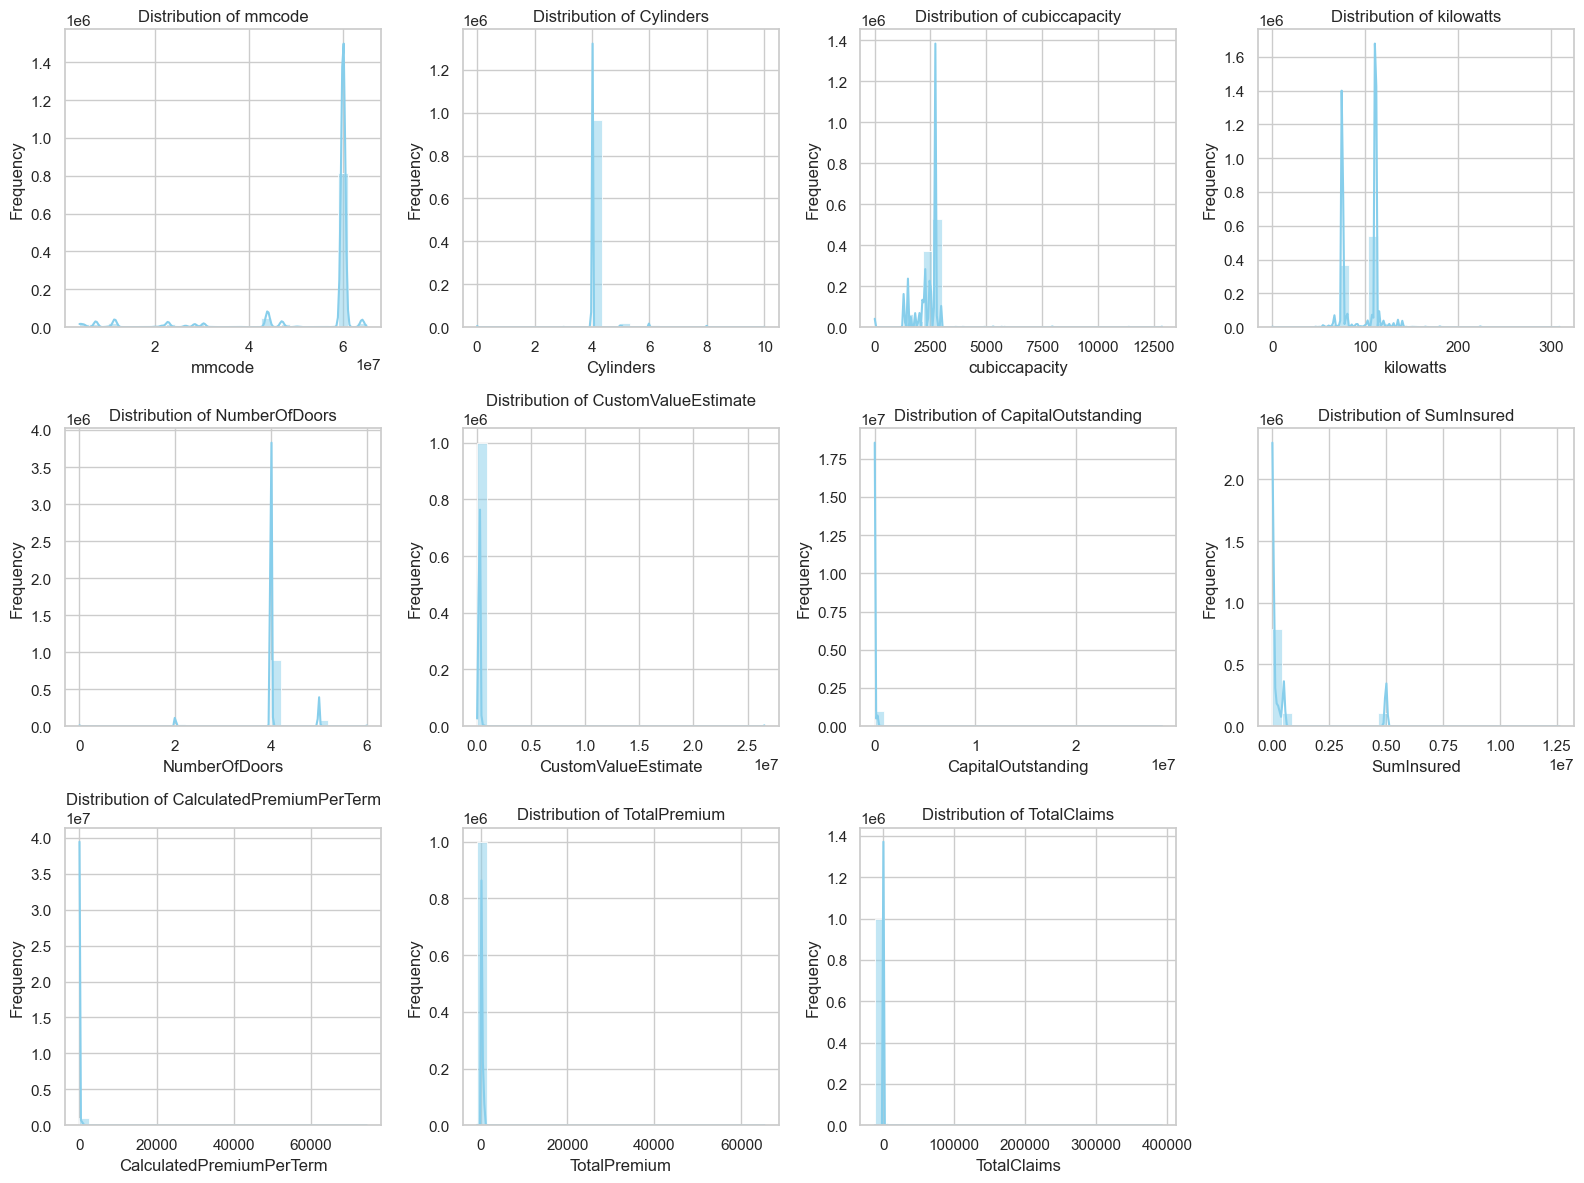

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical features
numerical_features = [
    'mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
    'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 
    'CalculatedPremiumPerTerm', 'ExcessSelected', 'TotalPremium', 'TotalClaims'
]

# Check if columns are numeric and filter out non-numeric ones
numerical_features = [col for col in numerical_features if pd.api.types.is_numeric_dtype(data[col])]

num_features = len(numerical_features)
num_cols = 4  # Number of columns in the grid
num_rows = int(np.ceil(num_features / num_cols))  # Calculate the number of rows needed

plt.figure(figsize=(num_cols * 4, num_rows * 4))
sns.set(style="whitegrid")

# Plot histograms with KDE for numerical columns
for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    if col in data.columns:
        # Ensure the column data is numeric
        data[col] = pd.to_numeric(data[col], errors='coerce') 
        sns.histplot(data[col].dropna(), bins=30, color='skyblue', kde=True, kde_kws={'bw_adjust': 0.5})
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        plt.title(f'Column {col} not found')
        plt.xlabel('N/A')
        plt.ylabel('N/A')

plt.tight_layout()
plt.show()


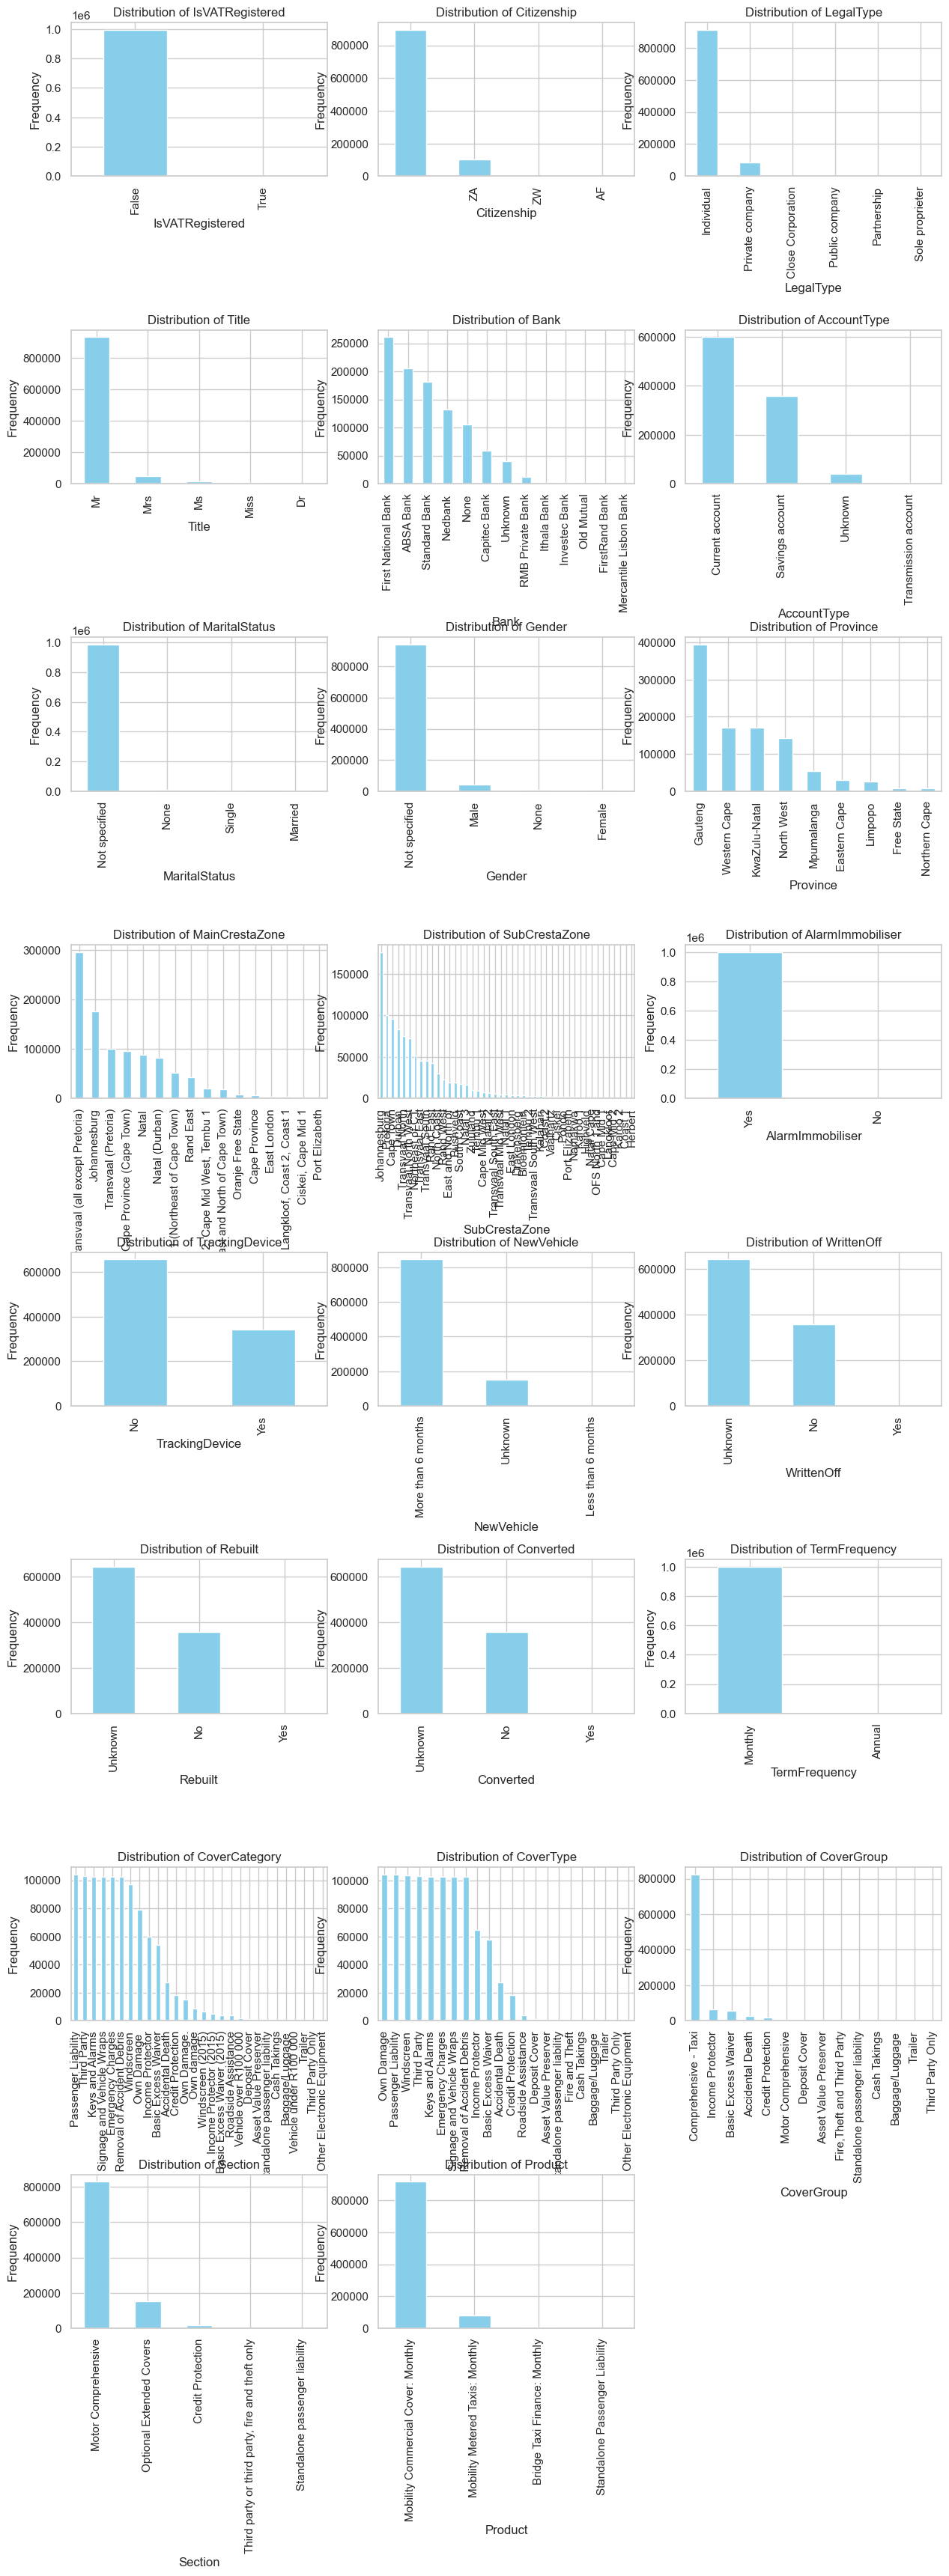

In [58]:

categorical_features = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank', 
    'AccountType', 'MaritalStatus', 'Gender', 'Province', 'MainCrestaZone', 
    'SubCrestaZone', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 
    'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'CoverCategory', 
    'CoverType', 'CoverGroup', 'Section', 'Product'
]

num_features = len(categorical_features)
num_cols = 3 
num_rows = int(np.ceil(num_features / num_cols))  # Calculate the number of rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Increase figure size

for i, col in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    if col in data.columns:
        data[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        plt.title(f'Column {col} not found')
        plt.xlabel('N/A')
        plt.ylabel('N/A')

plt.subplots_adjust(hspace=1.2, wspace=0.2)  
plt.show()


<font size="32"><b>Bivariate or Multivariate Analysis</b></font>

<font size="26"><b>Scatter Plot</b></font>

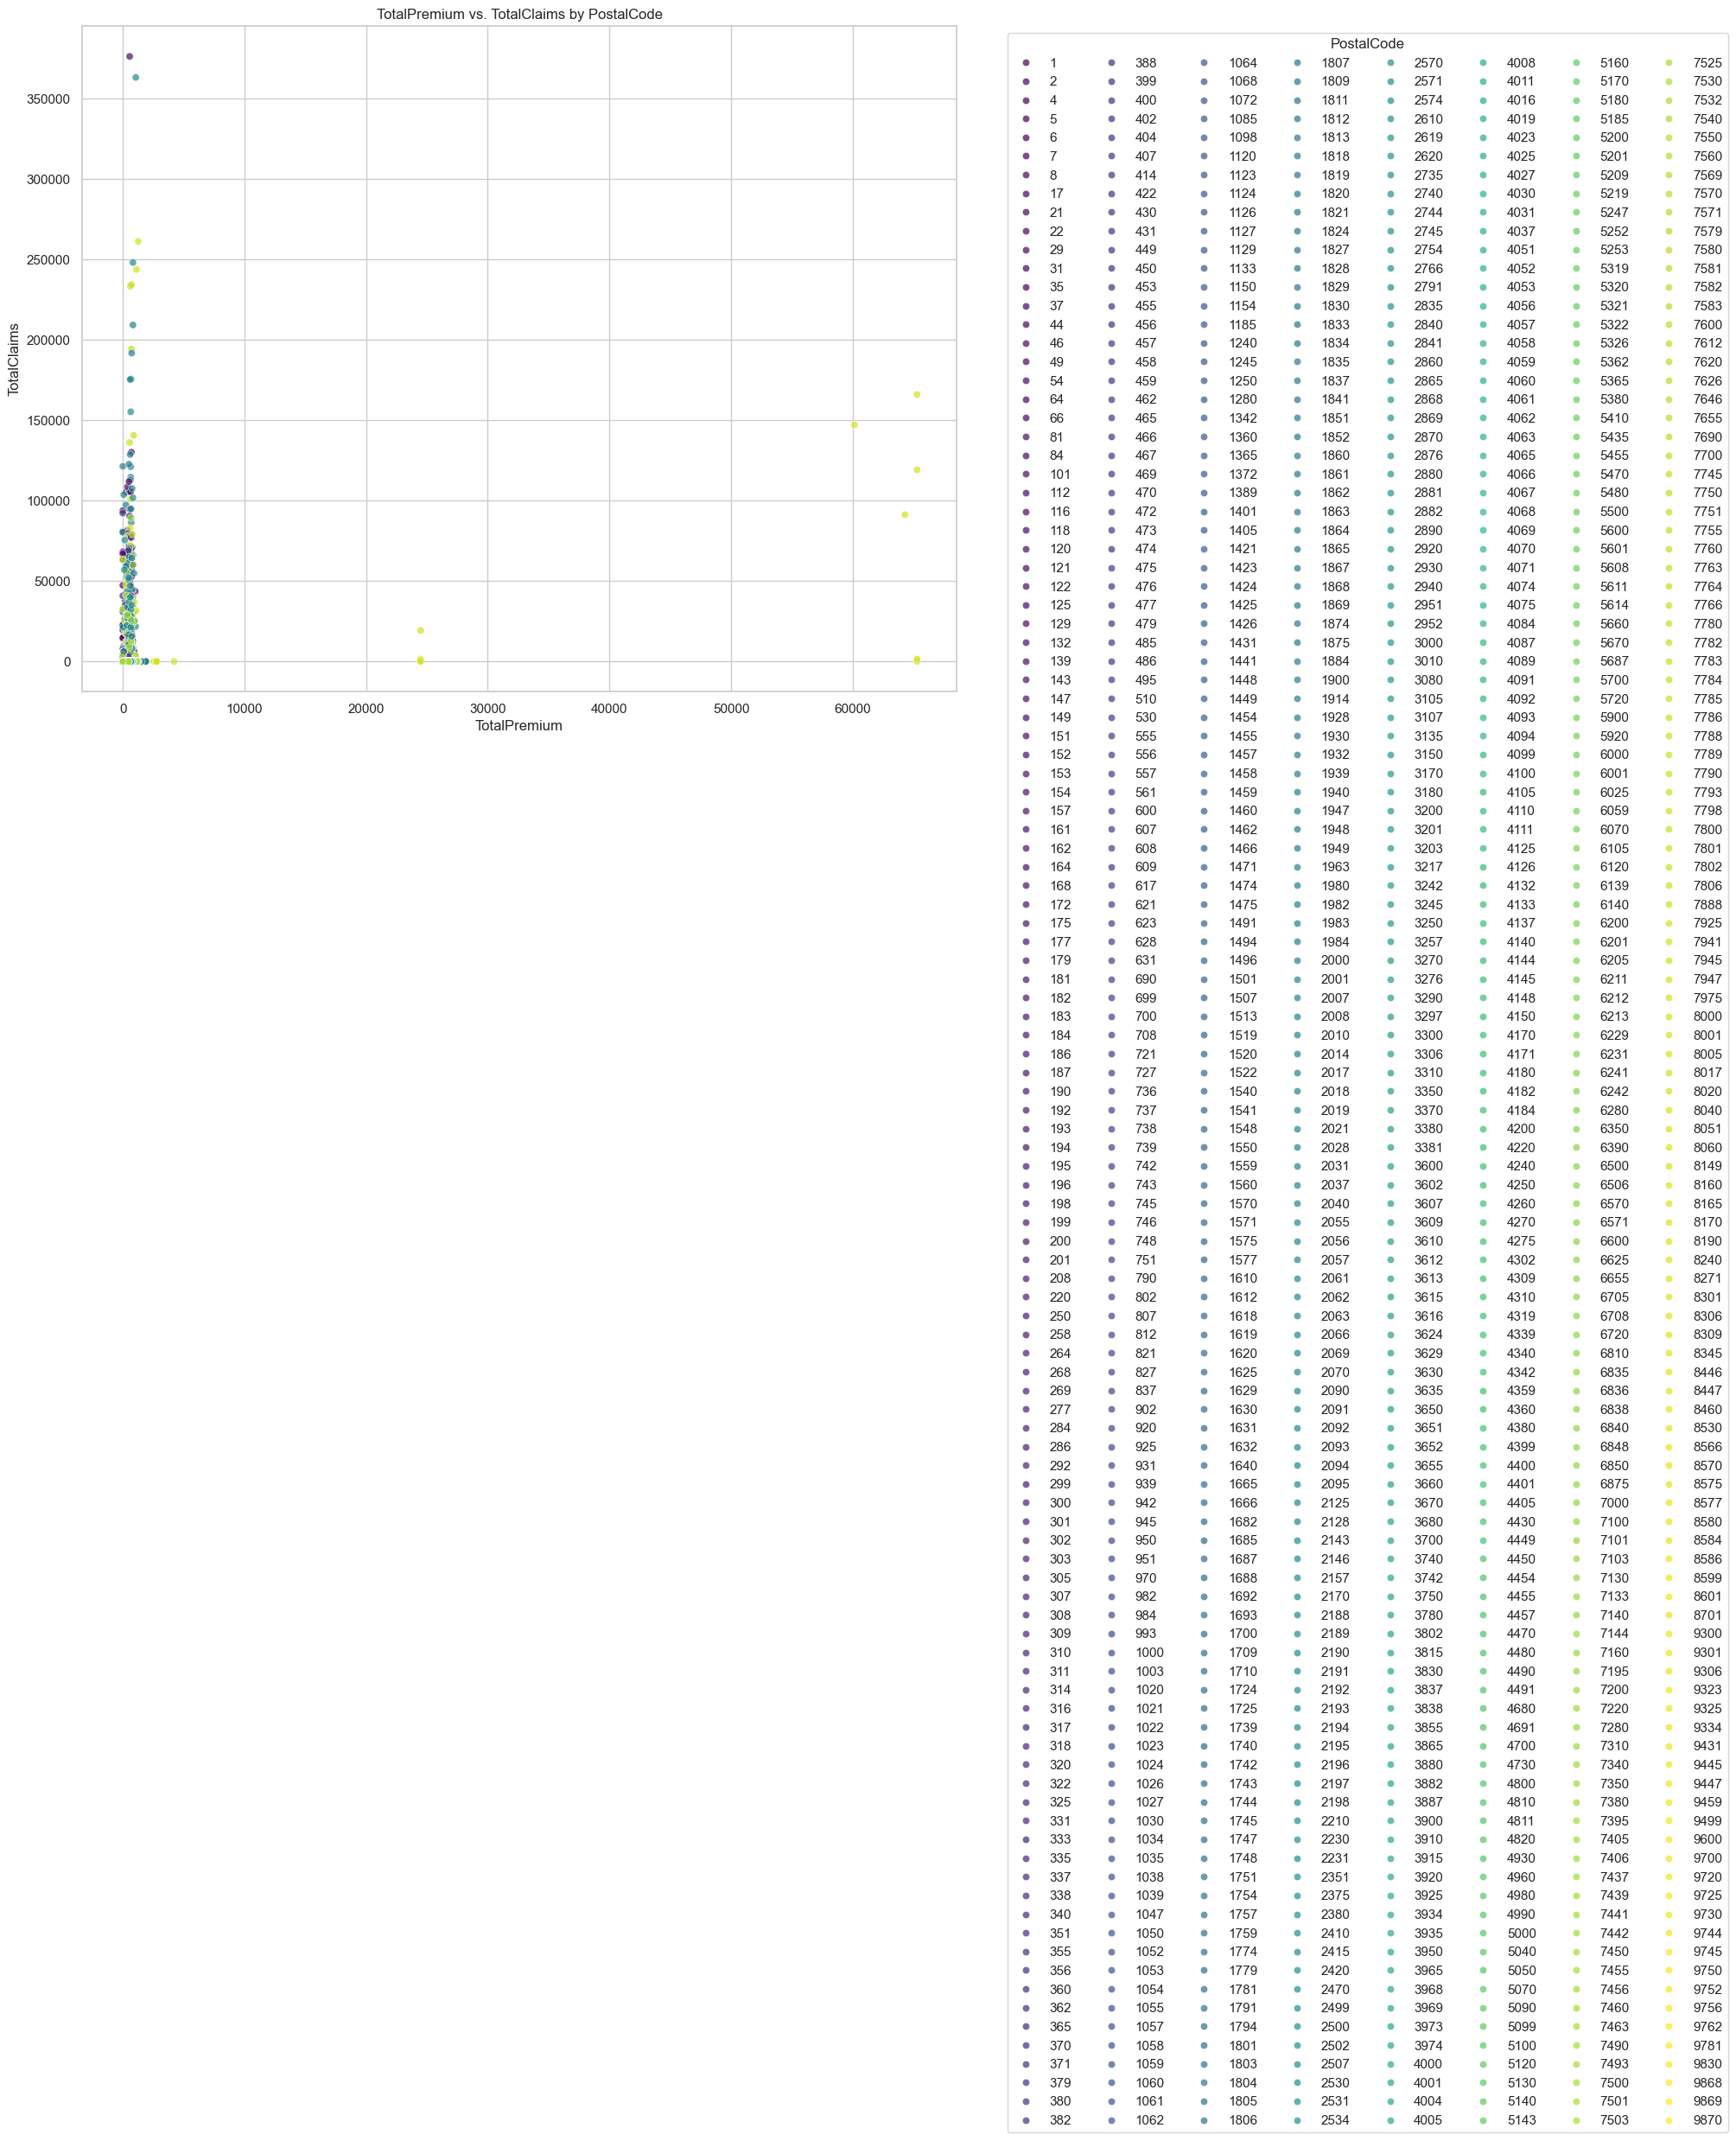

In [69]:

data['TotalPremium'] = pd.to_numeric(data['TotalPremium'], errors='coerce')
data['TotalClaims'] = pd.to_numeric(data['TotalClaims'], errors='coerce')

if data['PostalCode'].dtype == 'int64':
    data['PostalCode'] = data['PostalCode'].astype('category')

top_postal_codes = data['PostalCode'].value_counts().nlargest(10).index
data_reduced = data[data['PostalCode'].isin(top_postal_codes)]

plt.figure(figsize=(15, 10))
sns.scatterplot(data=data_reduced, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', alpha=0.7)

plt.title('TotalPremium vs. TotalClaims by PostalCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')

plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=8)  

plt.subplots_adjust(right=0.8)

plt.show()


<font size= "26"> <b> Correlation Matrix </b></font>

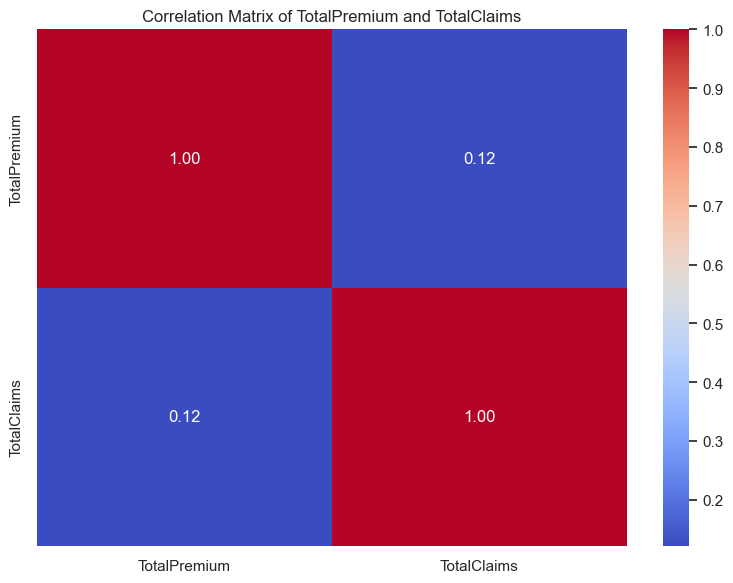

In [70]:

data['TotalPremium'] = pd.to_numeric(data['TotalPremium'], errors='coerce')
data['TotalClaims'] = pd.to_numeric(data['TotalClaims'], errors='coerce')

correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.tight_layout()
plt.show()


<font size ="32"><b>Data Comparison</b></font>

<font size="12"><b> Comparison of Insurance Cover Type by Province</b></font>

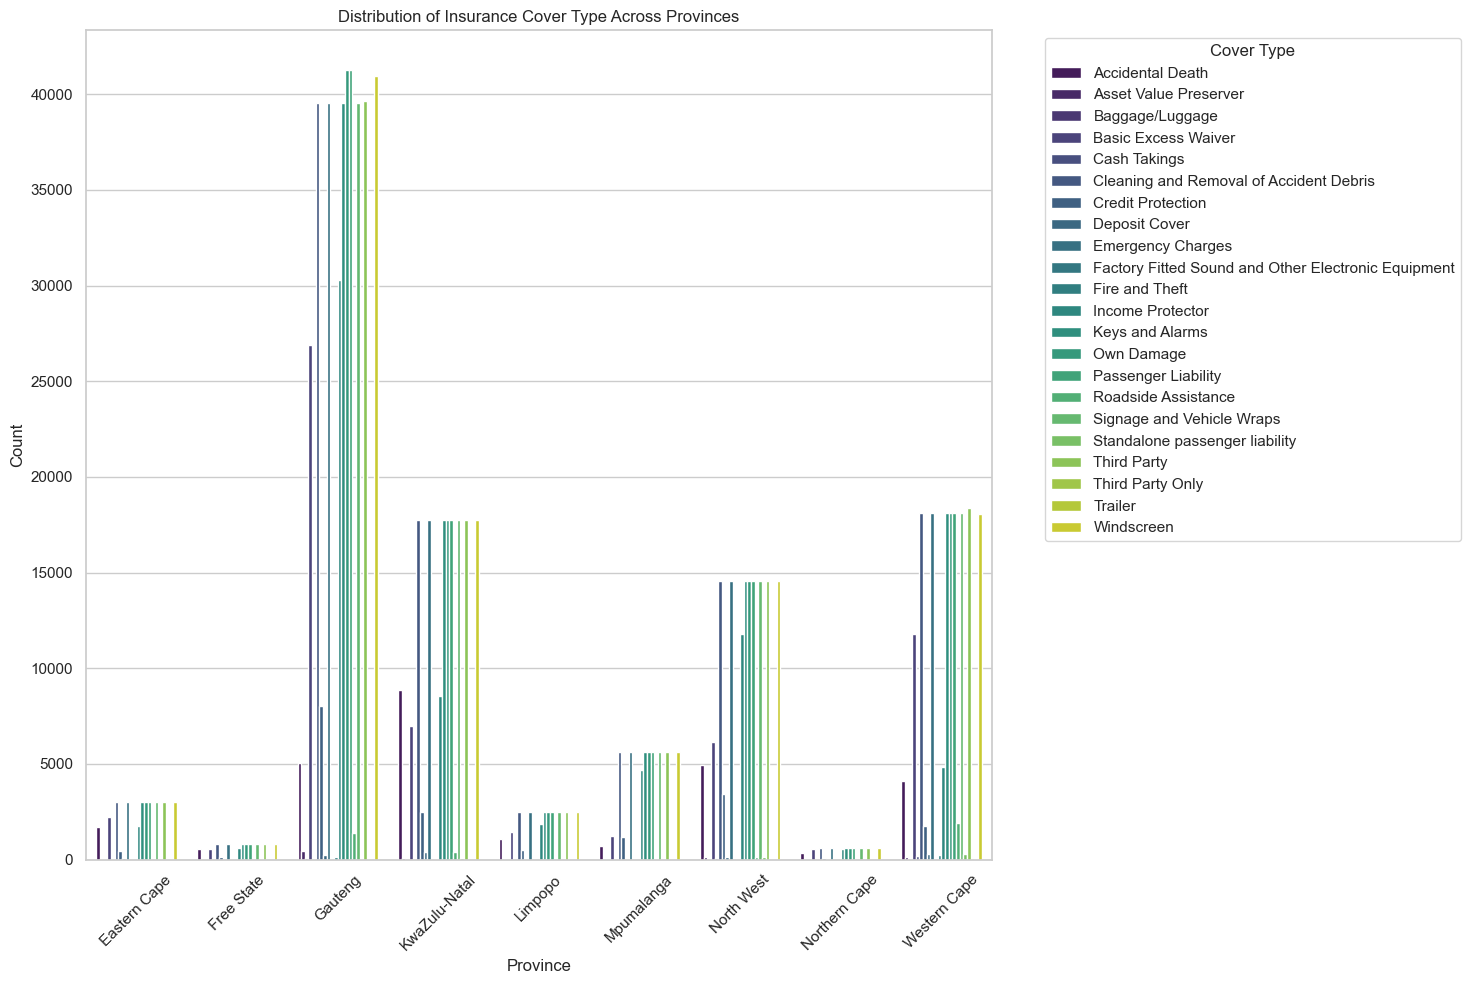

In [71]:

data['CoverType'] = data['CoverType'].astype('category')
data['Province'] = data['Province'].astype('category')

plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Province', hue='CoverType', palette='viridis')
plt.title('Distribution of Insurance Cover Type Across Provinces')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<font size="16"><b>Trends in Total Premium by Province</b></font>

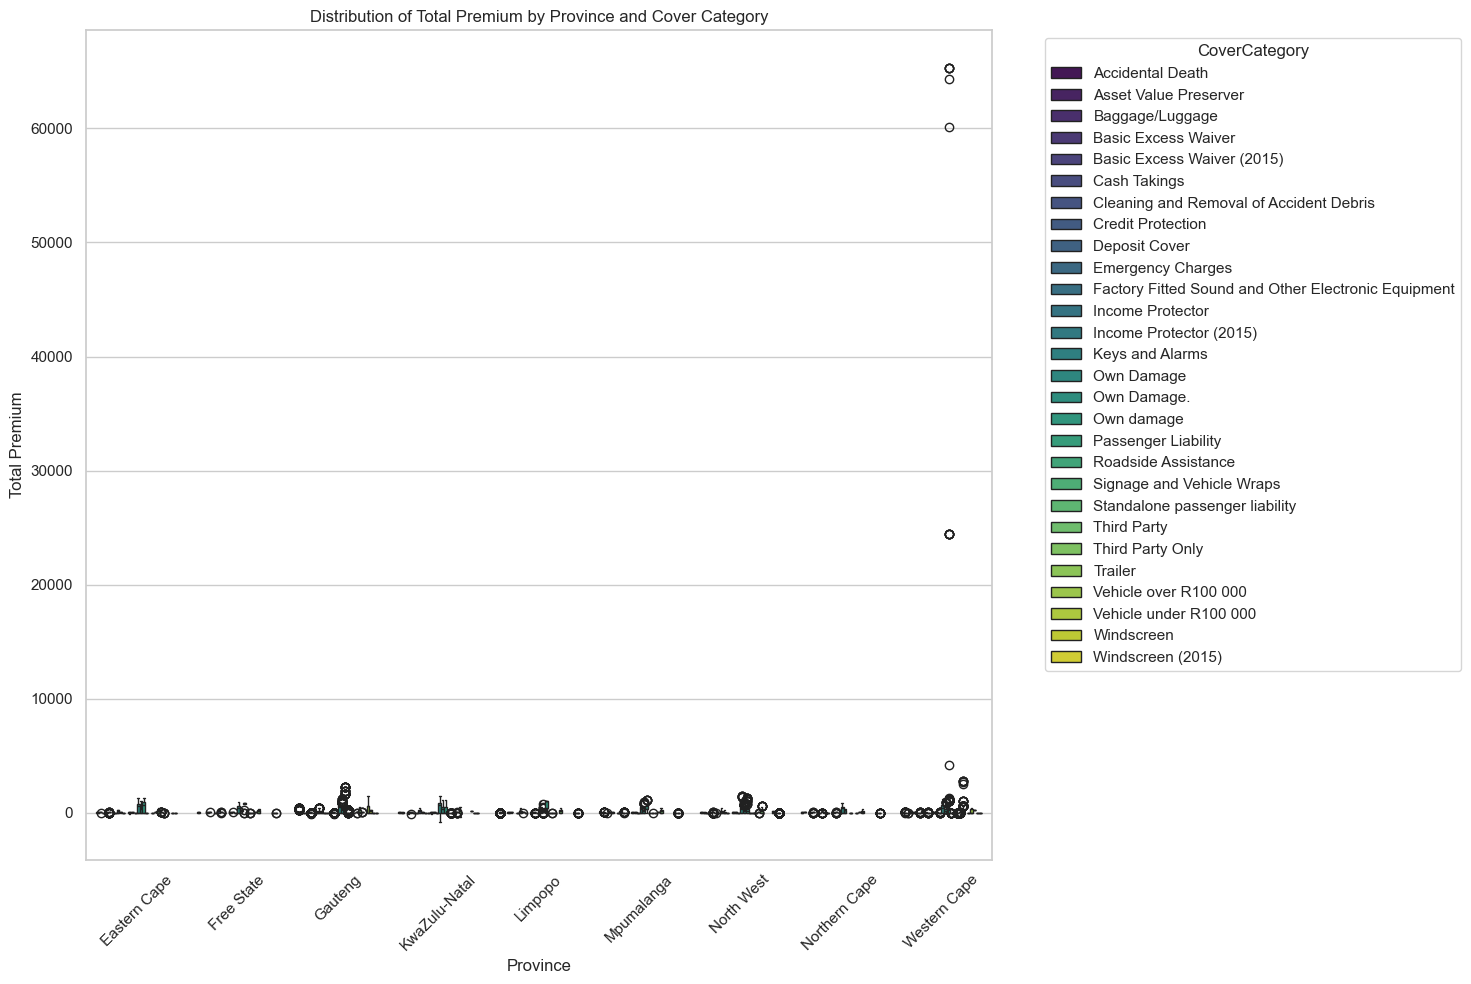

In [76]:
data['TotalPremium'] = pd.to_numeric(data['TotalPremium'], errors='coerce')
data['Province'] = data['Province'].astype('category')
data['CoverCategory'] = data['CoverCategory'].astype('category')

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Province', y='TotalPremium', hue='CoverCategory', palette='viridis')
plt.title('Distribution of Total Premium by Province and Cover Category')
plt.xlabel('Province')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='CoverCategory', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<font size="16"><b>Auto Make Distribution Across Provinces</b></font>

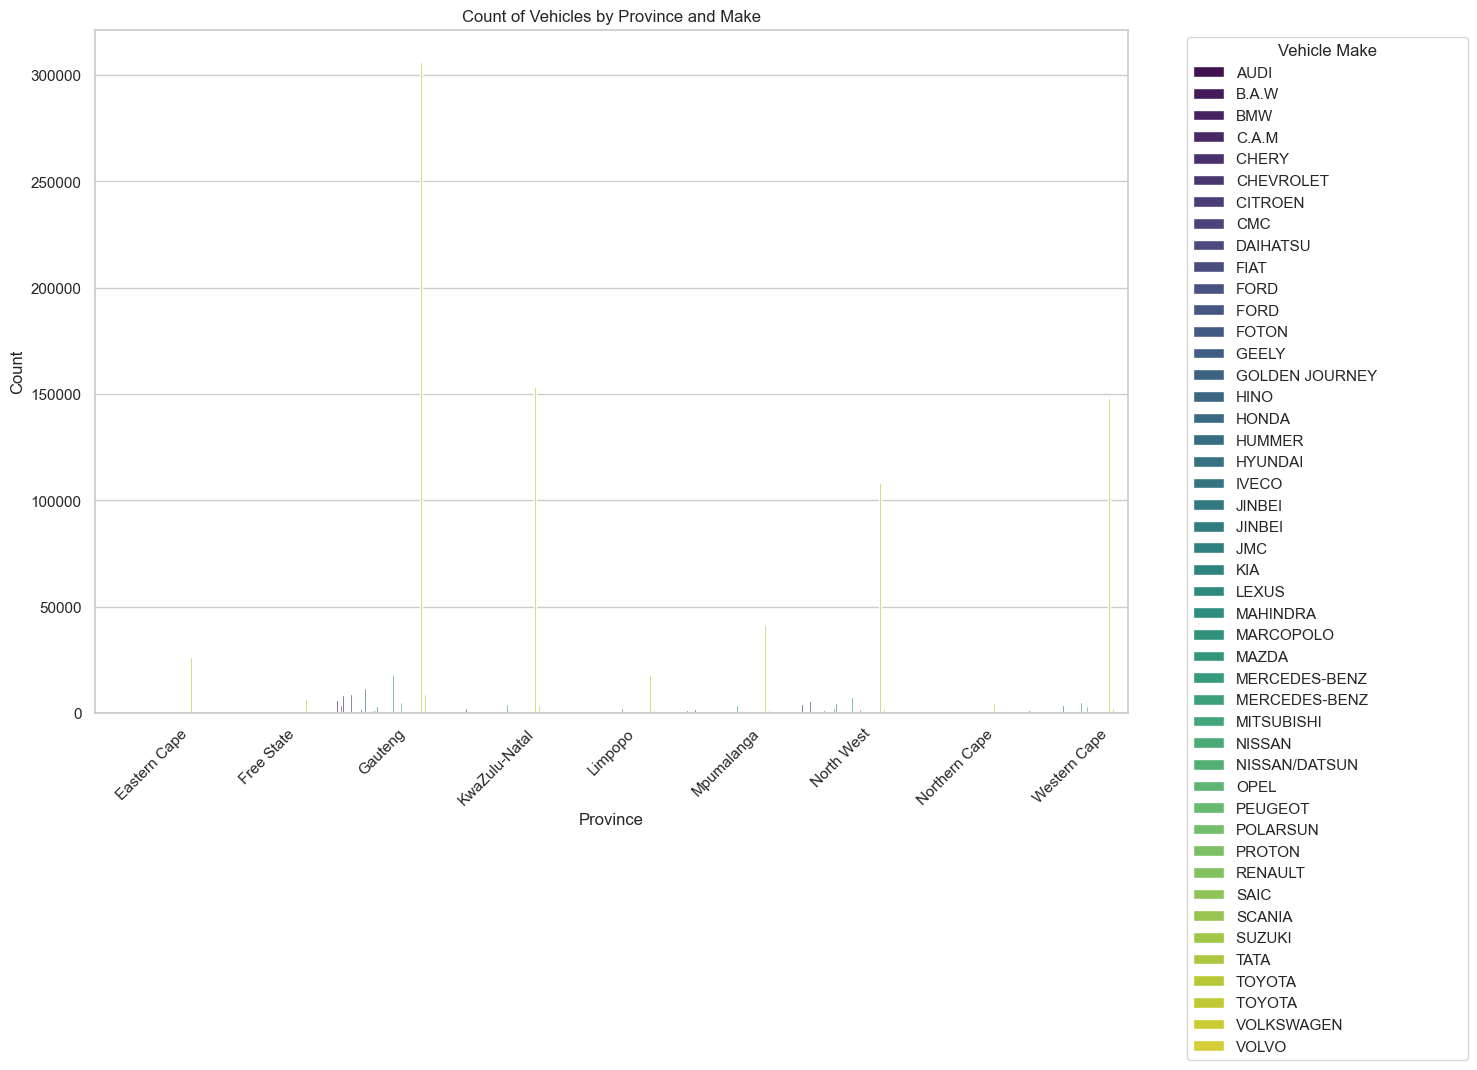

In [79]:
data['make'] = data['make'].astype('category')

plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Province', hue='make', palette='viridis')
plt.title('Count of Vehicles by Province and Make')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<font size="16"><b>Premium Trends Over Time</b></font>

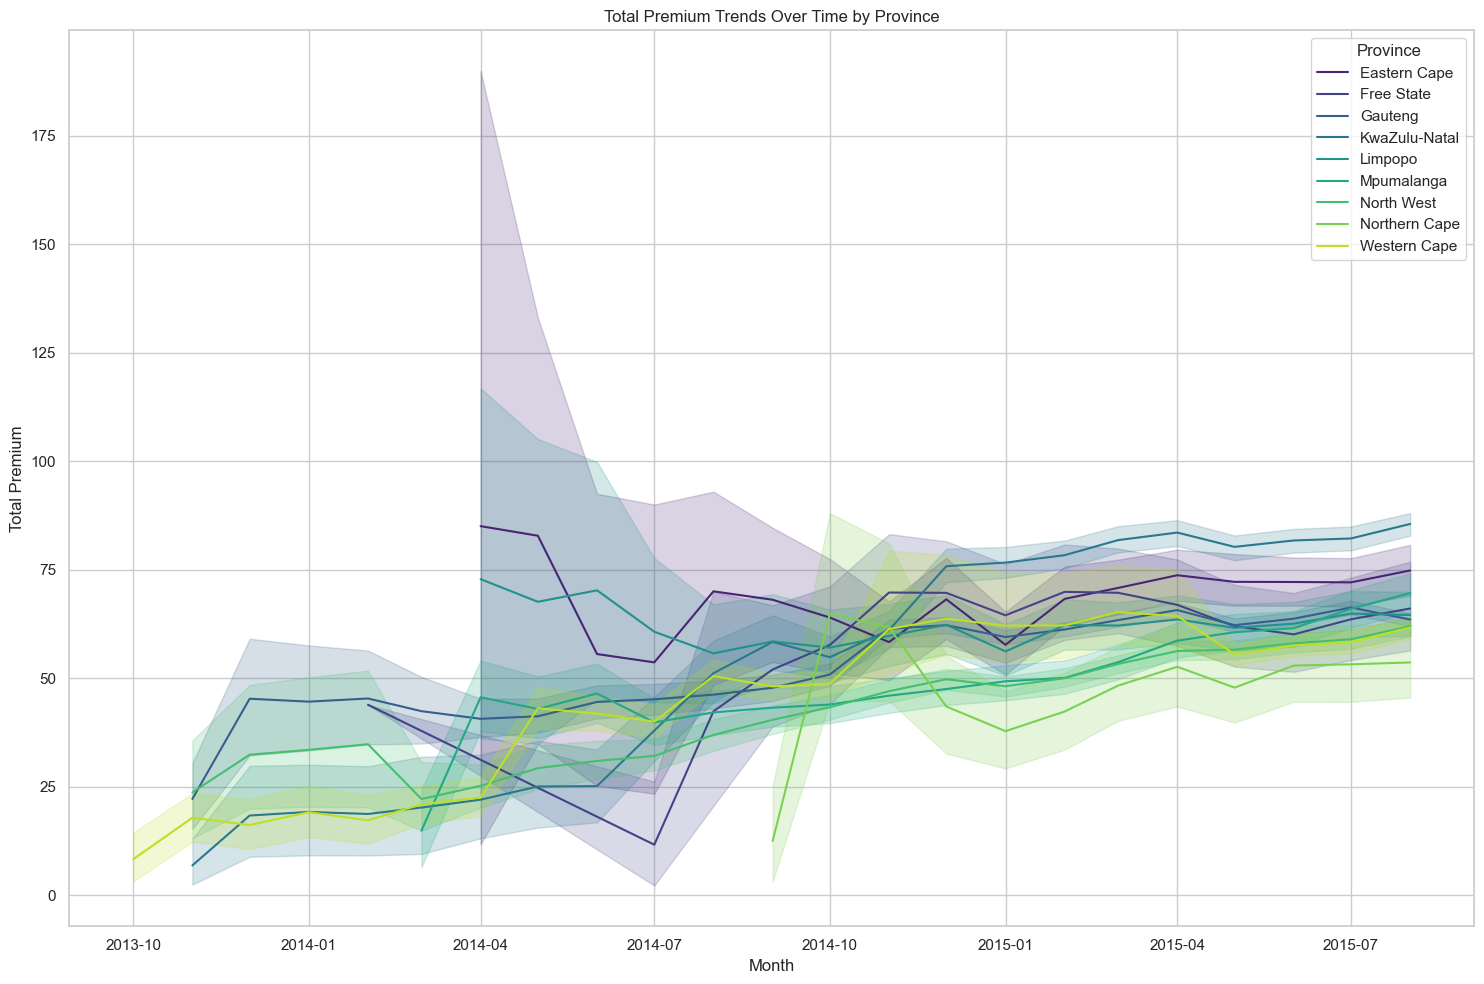

In [80]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')

plt.figure(figsize=(15, 10))
sns.lineplot(data=data, x='TransactionMonth', y='TotalPremium', hue='Province', palette='viridis')
plt.title('Total Premium Trends Over Time by Province')
plt.xlabel('Month')
plt.ylabel('Total Premium')

plt.tight_layout()
plt.show()

<font size="16"><b>Outlier Detection</b></font>

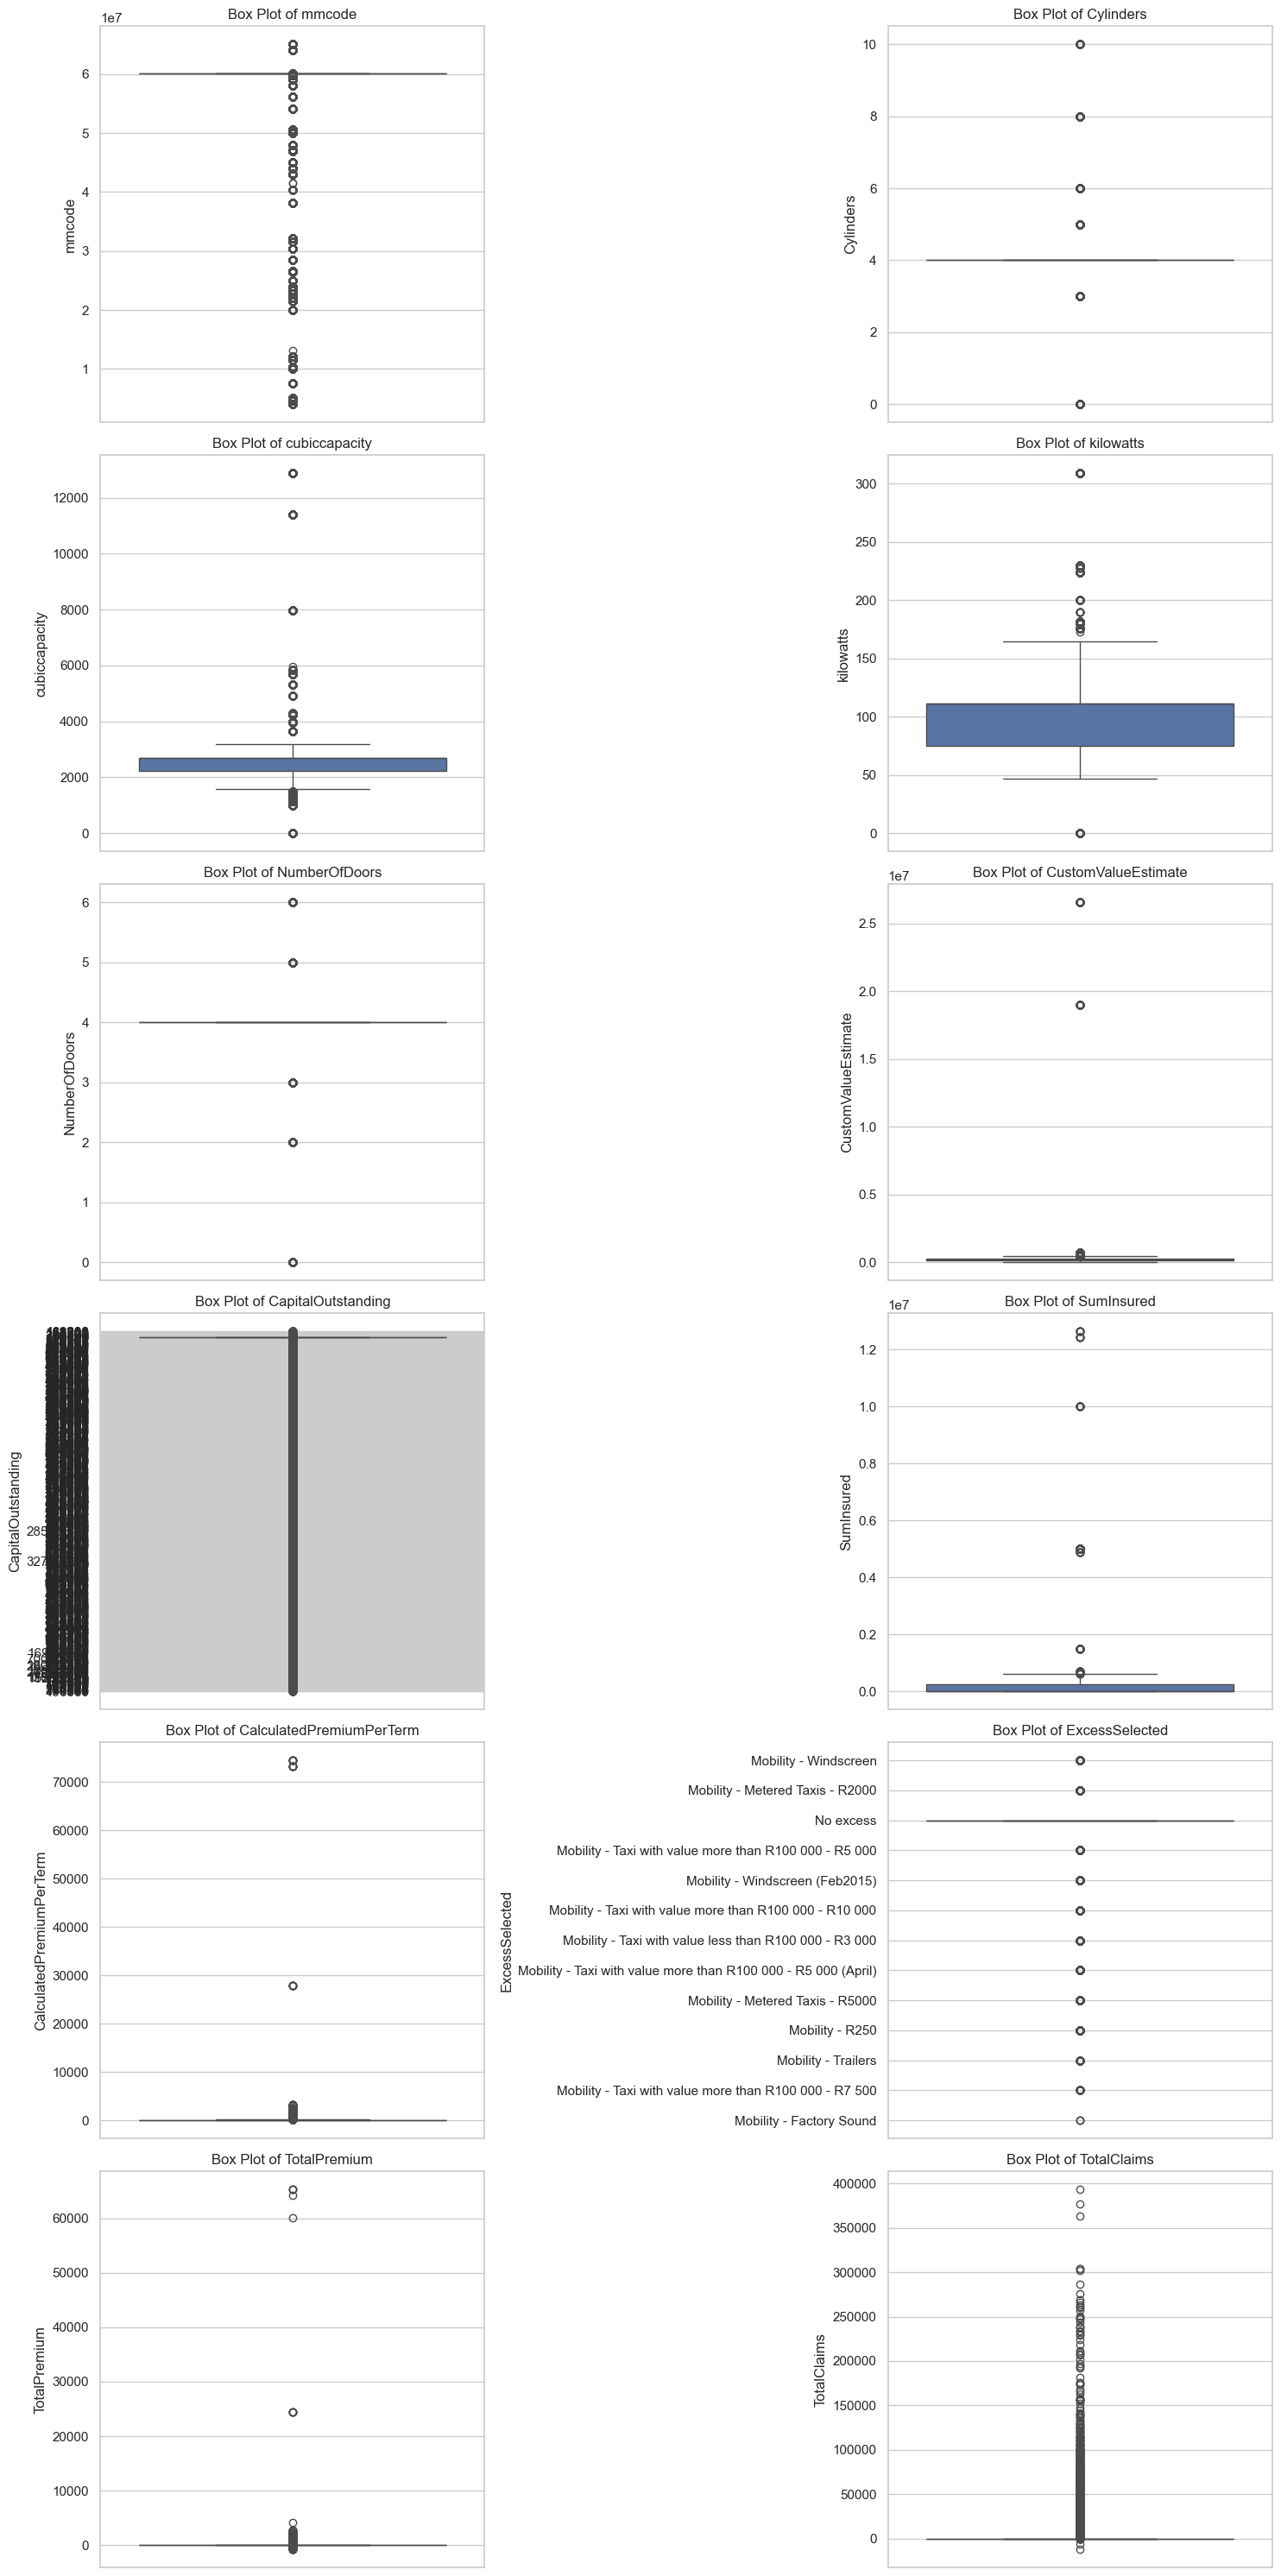

In [87]:
numerical_columns = [
    'mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
    'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 
    'CalculatedPremiumPerTerm', 'ExcessSelected', 'TotalPremium', 'TotalClaims'
] 
num_plots = len(numerical_columns)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols  

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

<font size="16"><b>Visualization</b></font>

<font size="10"><b> Distribution of Insurance Premiums by Vehicle Make</b></font>

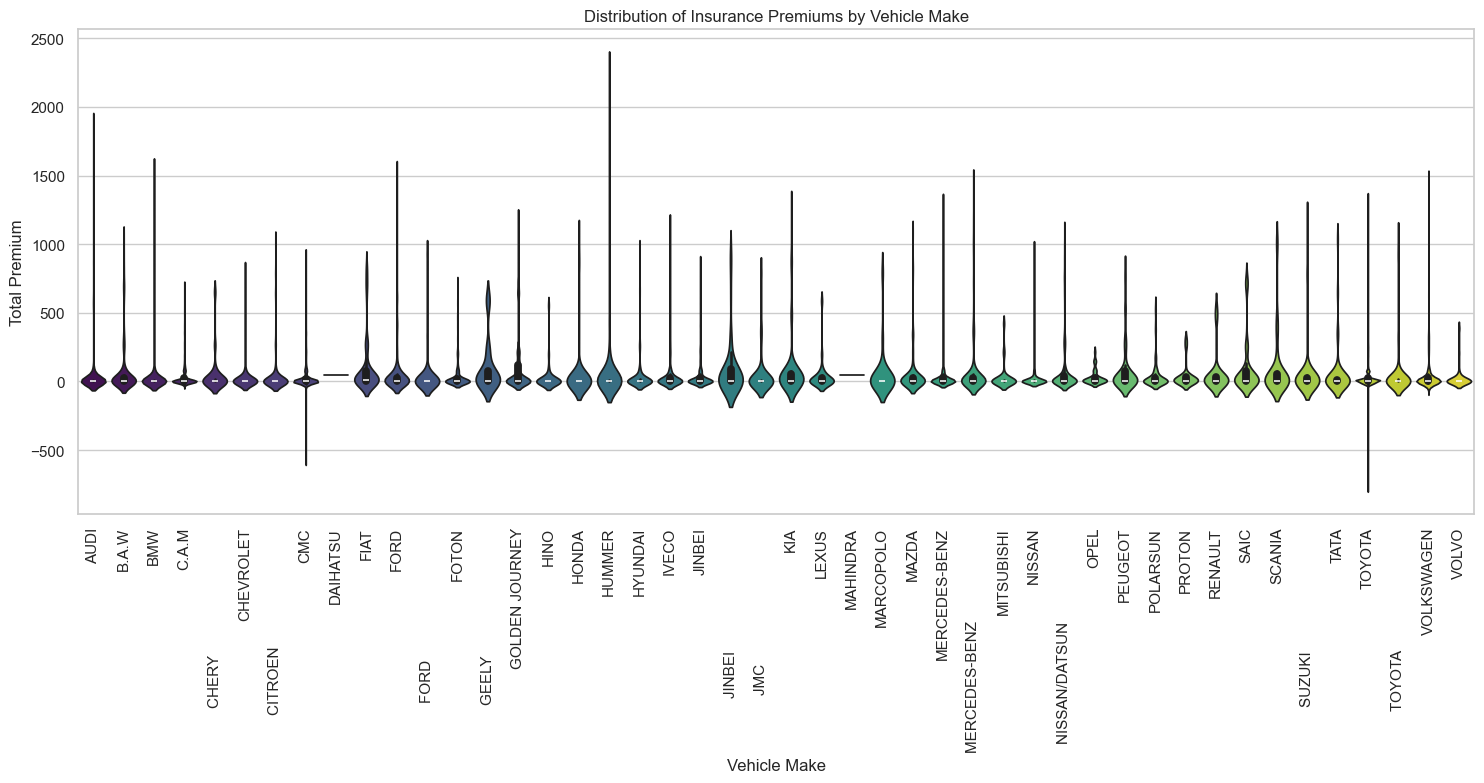

In [95]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=data, x='make', y='TotalPremium', hue='make', palette='viridis', legend=False)
plt.title('Distribution of Insurance Premiums by Vehicle Make')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Make')
plt.ylabel('Total Premium')
plt.tight_layout()
plt.show()



<font size="10"><b>Total Claims vs. Total Premiums by Province</b></font>

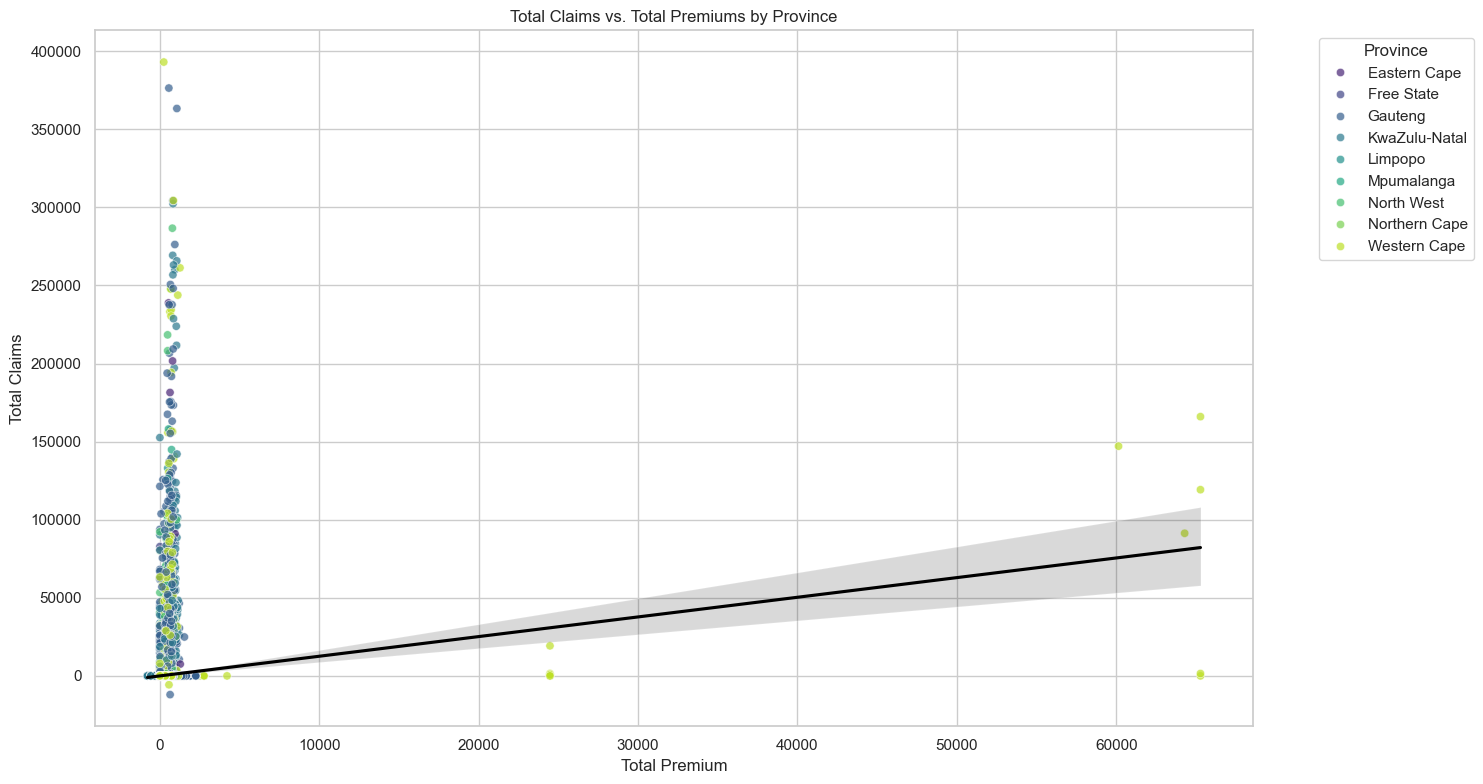

In [96]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='Province', palette='viridis', alpha=0.7)
sns.regplot(data=data, x='TotalPremium', y='TotalClaims', scatter=False, color='black')
plt.title('Total Claims vs. Total Premiums by Province')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<font size="10"><b>Box Plot of Premiums by Cover Category</b></font>

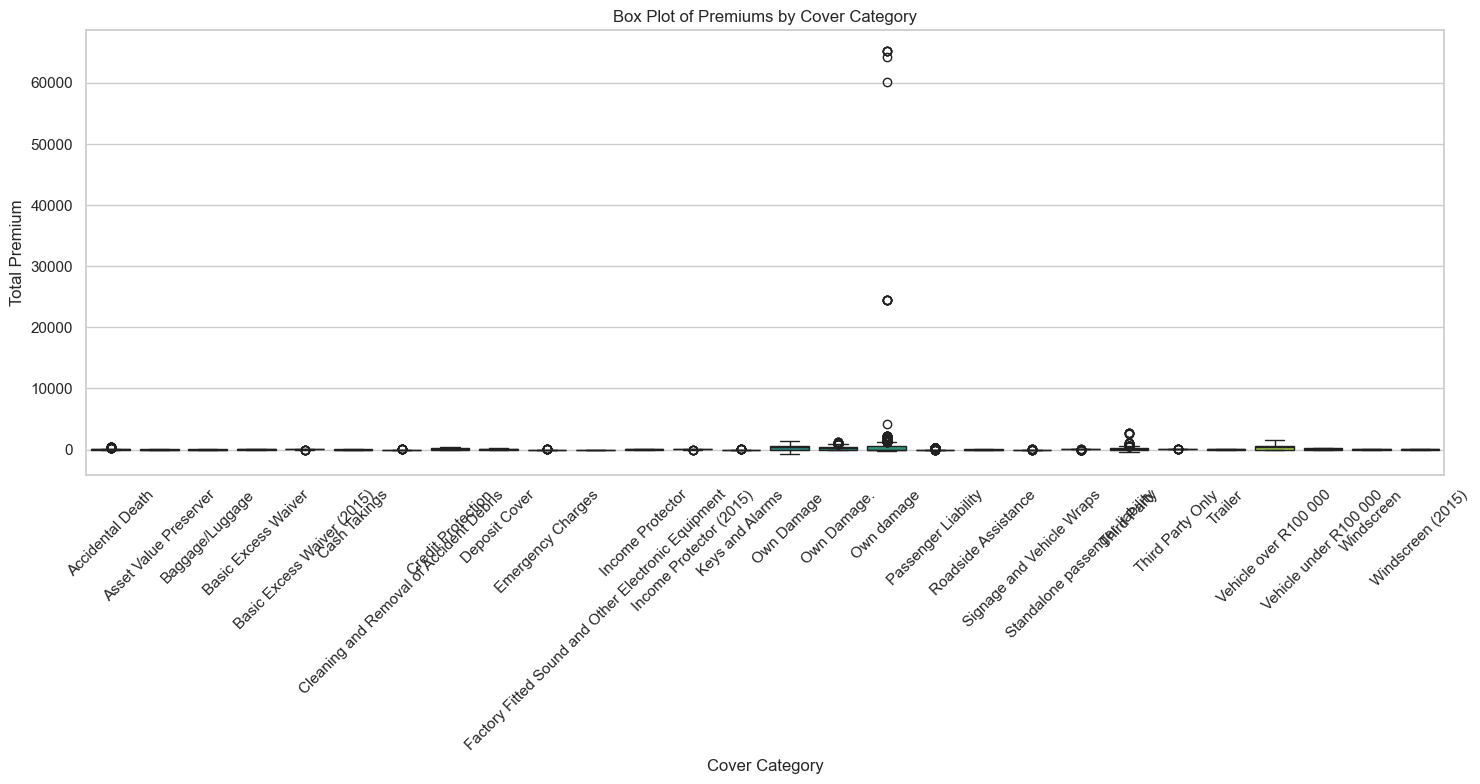

In [98]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='CoverCategory', y='TotalPremium', hue='CoverCategory', palette='viridis', dodge=False)
plt.title('Box Plot of Premiums by Cover Category')
plt.xticks(rotation=45)
plt.xlabel('Cover Category')
plt.ylabel('Total Premium')
plt.tight_layout()
plt.show()
